<a href="https://colab.research.google.com/github/fadhel1597/movie_recomendation/blob/main/Toxic_Comment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
! pip install -q kaggle

In [61]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"fadhelhaidar","key":"9d5a002e486d72d36ae3907021de9f9c"}'}

In [62]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [63]:
! cp kaggle.json ~/.kaggle/

In [64]:
! chmod 600 ~/.kaggle/kaggle.json

In [65]:
! kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

jigsaw-toxic-comment-classification-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [66]:
! mkdir jigsaw-toxic-comment-classification-challenge

mkdir: cannot create directory ‘jigsaw-toxic-comment-classification-challenge’: File exists


In [67]:
! unzip jigsaw-toxic-comment-classification-challenge.zip -d jigsaw-toxic-comment-classification-challenge

Archive:  jigsaw-toxic-comment-classification-challenge.zip
replace jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip  
  inflating: jigsaw-toxic-comment-classification-challenge/test.csv.zip  
  inflating: jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip  
  inflating: jigsaw-toxic-comment-classification-challenge/train.csv.zip  


In [68]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.vec.zip

--2023-01-21 15:09:38--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 172.67.9.4, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 587879973 (561M) [application/zip]
Saving to: ‘wiki-news-300d-1M-subword.vec.zip.1’

wiki-news-300d-1M-s 100%[===================>] 560.65M  43.3MB/s    in 13s     

2023-01-21 15:09:51 (44.6 MB/s) - ‘wiki-news-300d-1M-subword.vec.zip.1’ saved [587879973/587879973]



In [69]:
!unzip wiki-news-300d-1M-subword.vec.zip

Archive:  wiki-news-300d-1M-subword.vec.zip
replace wiki-news-300d-1M-subword.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: wiki-news-300d-1M-subword.vec  A



In [70]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

plt.style.use('seaborn')

In [71]:
data = pd.read_csv("/content/jigsaw-toxic-comment-classification-challenge/train.csv.zip")
data.shape

(159571, 8)

In [72]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [74]:
data["non_toxic"] = data.iloc[:,2:8].apply(lambda x: 1 if (sum(x)==0) else 0, axis=1)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [75]:
data.shape

(159571, 9)

In [76]:
categories = list(data.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']


In [77]:
counts = []
for category in categories:
    counts.append((category, data[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405
6,non_toxic,143346


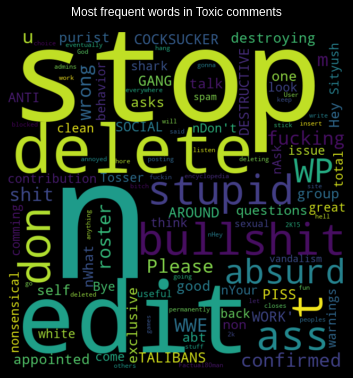

In [78]:
def word_plot(column,text):
    
    comments = data['comment_text'].loc[column == 1].values     # sort by toxicity
    
    word_cloud = WordCloud( width = 640, height = 640, background_color = 'black',
                stopwords = STOPWORDS).generate(str(comments))     # stopwords are a,an,the
    
    fig = plt.figure( figsize = (8, 5), facecolor = 'k', edgecolor = 'k')
    plt.subplot()
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.suptitle("Most frequent words in " +  text , y = 1.06,color = "white")
    plt.tight_layout(pad = 0)
    plt.axis('off')
    plt.show()
    
word_plot(data['toxic'], "Toxic comments")

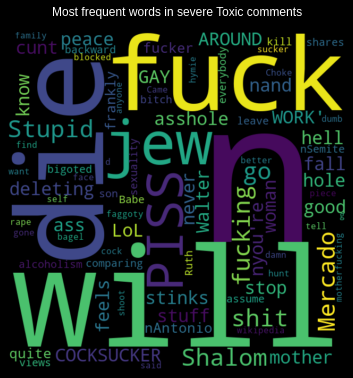

In [79]:
word_plot(data['severe_toxic'],"severe Toxic comments")

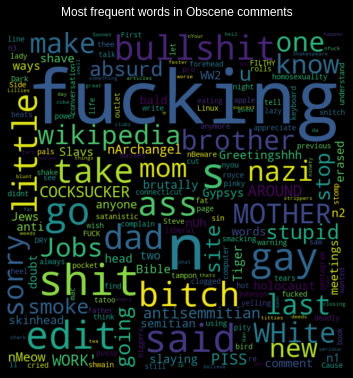

In [80]:
word_plot(data['obscene'],"Obscene comments")

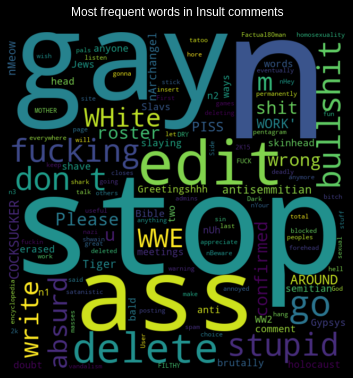

In [81]:
word_plot(data['insult'],"Insult comments")

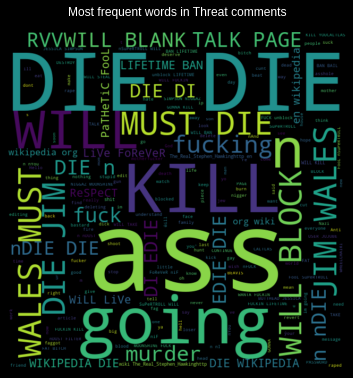

In [82]:
word_plot(data['threat'],"Threat comments")

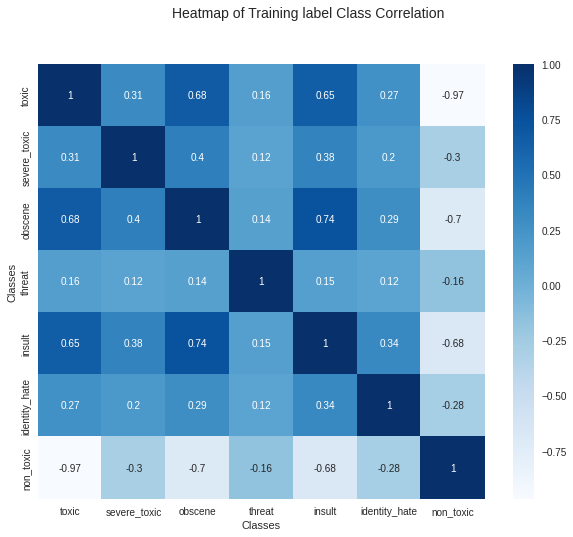

In [83]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot=True,cmap="Blues")
plt.suptitle('Heatmap of Training label Class Correlation',size = 14)
plt.xlabel("Classes")
plt.ylabel("Classes")
plt.show()

In [84]:
# data.drop(['id'], inplace=True, axis=1)
# data['labels'] = data.iloc[:, 1:].values.tolist()
# data.drop(data.columns.values[1:-1].tolist(), inplace=True, axis=1)
# data

In [85]:
data["comment_text"] = data["comment_text"].str.lower()
data["comment_text"] = data["comment_text"].str.replace("\xa0", " ", regex=False).str.split().str.join(" ")

In [86]:
import gensim.models.keyedvectors as word2vec
import pandas as pd
import gc
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import CuDNNLSTM, CuDNNGRU
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from tqdm import tqdm

In [87]:
train = data
test = pd.read_csv("/content/jigsaw-toxic-comment-classification-challenge/test.csv.zip")
embed_size=0

In [88]:
list_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']
y = train[list_classes].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

In [89]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [90]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [91]:
def loadEmbeddingMatrix(typeToLoad):
        # load different embedding file from Kaggle depending on which embedding 
        # matrix we are going to experiment with

        EMBEDDING_FILE='/content/wiki-news-300d-1M-subword.vec'
        embed_size = 300
        embeddings_index = dict()
        # Transfer the embedding weights into a dictionary by iterating through every line of the file.
        f = open(EMBEDDING_FILE)
        for line in tqdm(f):
            try:
                # split up line into an indexed array
                values = line.split()
                # first index is word
                word = values[0]
                # store the rest of the values in the array as a new array
                coefs = np.asarray(values[1:], dtype='float32')
                # ignore values without headers as word
                if len(coefs)==300:
                    embeddings_index[word] = coefs #300 dimension
                else:
                    continue
            except:
                # split up line into an indexed array
                values = line.split()
                # first index is word or sometimes the second as well
                word = values[1]
                # store the rest of the values in the array as a new array
                coefs = np.asarray(values[2:], dtype='float32')
                print(values[:2])
                print(len(coefs))
                embeddings_index[word] = coefs #300 dimension
        f.close()
        print('Loaded %s word vectors.' % len(embeddings_index))
        #return embeddings_index
            
        gc.collect()
        # We get the mean and standard deviation of the embedding weights so that we could maintain the 
        # same statistics for the rest of our own random generated weights. 
        all_embs = np.stack(embeddings_index.values())
        #np.stack(list(embeddings_index.values()))
        emb_mean, emb_std = all_embs.mean(), all_embs.std()
        
        nb_words = len(tokenizer.word_index)
        # We are going to set the embedding size to the pretrained dimension as we are replicating it.
        # the size will be Number of Words in Vocab X Embedding Size
        embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
        gc.collect()

        # With the newly created embedding matrix, we'll fill it up with the words that we have in both 
        # our own dictionary and loaded pretrained embedding. 
        embeddedCount = 0
        for word, i in tokenizer.word_index.items():
            i-=1
            # then we see if this word is in glove's dictionary, if yes, get the corresponding weights
            embedding_vector = embeddings_index.get(word)
            # and store inside the embedding matrix that we will train later on.
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
                embeddedCount+=1
        print('total embedded:',embeddedCount,'common words')
        
        del(embeddings_index)
        gc.collect()
        
        # finally, return the embedding matrix
        return embedding_matrix

In [92]:
embedding_matrix = loadEmbeddingMatrix('fasttext')

999995it [00:52, 19080.05it/s]
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Loaded 999994 word vectors.
total embedded: 88254 common words


In [93]:
embedding_matrix.shape

(209630, 300)

In [94]:
inp = Input(shape=(maxlen, ))

In [95]:
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True)(inp)

In [96]:
#x = Bidirectional(LSTM(60, return_sequences=True, name='lstm_layer', dropout=0.1, recurrent_dropout=0.1))(x)
x = Bidirectional(CuDNNLSTM(60, return_sequences=True, name='lstm_layer'))(x)
x = Dropout(0.1)(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(7, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [97]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 200, 300)          62889000  
                                                                 
 bidirectional_5 (Bidirectio  (None, 200, 120)         173760    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 200, 120)          0         
                                                                 
 global_max_pooling1d_2 (Glo  (None, 120)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_8 (Dropout)         (None, 120)               0   

In [98]:
batch_size = 32
epochs = 4
hist = model.fit(X_t, y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/4
4488/4488 [==============================] - 230s 51ms/step - loss: 0.0700 - accuracy: 0.9519 - val_loss: 0.0553 - val_accuracy: 0.9615
Epoch 2/4
4488/4488 [==============================] - 229s 51ms/step - loss: 0.0496 - accuracy: 0.9645 - val_loss: 0.0537 - val_accuracy: 0.9612
Epoch 3/4
4488/4488 [==============================] - 229s 51ms/step - loss: 0.0416 - accuracy: 0.9713 - val_loss: 0.0584 - val_accuracy: 0.9585
Epoch 4/4
4488/4488 [==============================] - 229s 51ms/step - loss: 0.0351 - accuracy: 0.9768 - val_loss: 0.0619 - val_accuracy: 0.9585


In [99]:
# some predictions
print(list_sentences_test[25])
print(dict(zip(list_classes, model.predict(X_te[10:11])[0])))
print()
print()
print(list_sentences_test[999])
print(dict(zip(list_classes, model.predict(X_te[1001:1002])[0])))
print()
print()

# training data
i=2022
print(list_sentences_train[i])
print(dict(zip(list_classes, model.predict(X_t[i:i+1])[0])))
print('Actual Values:', train[list_classes].iloc[i].to_dict())
print()
print()
i=159444
print(list_sentences_train[i])
print(dict(zip(list_classes, model.predict(X_t[i:i+1])[0])))
print('Actual Values:', train[list_classes].iloc[i].to_dict())

MLM Software,NBFC software,Non Banking Financial Company,NBFC software company,NBFC software in india,software for banking,Gold loan software.MLM Software  

 '''SEO Services 
 Search Engine Optimization 
 www.liveindiatech.com 

 According to a recenBold textt survey people have moved away from searching print media for their needs. They use search engines to find the products and services. The first step to have a successful presence over the internet is creating your own website but that is not enough. When someone searches for the products/services that you offer your name needs to be listed high in the search engine.  

 Live India Tech guarantees you search engine optimization using which your organizations name will feature in the top ten listing in all the search engines. This will ensure that the traffic to your site will increase exponentially aiding you in the sales of more products and services.  

 We have invested enough resources to develop an SEO system that is far supe